**Testing the AD implementation**

NumPy ARS: 0.1531s, JAX ARS: 54.2421s


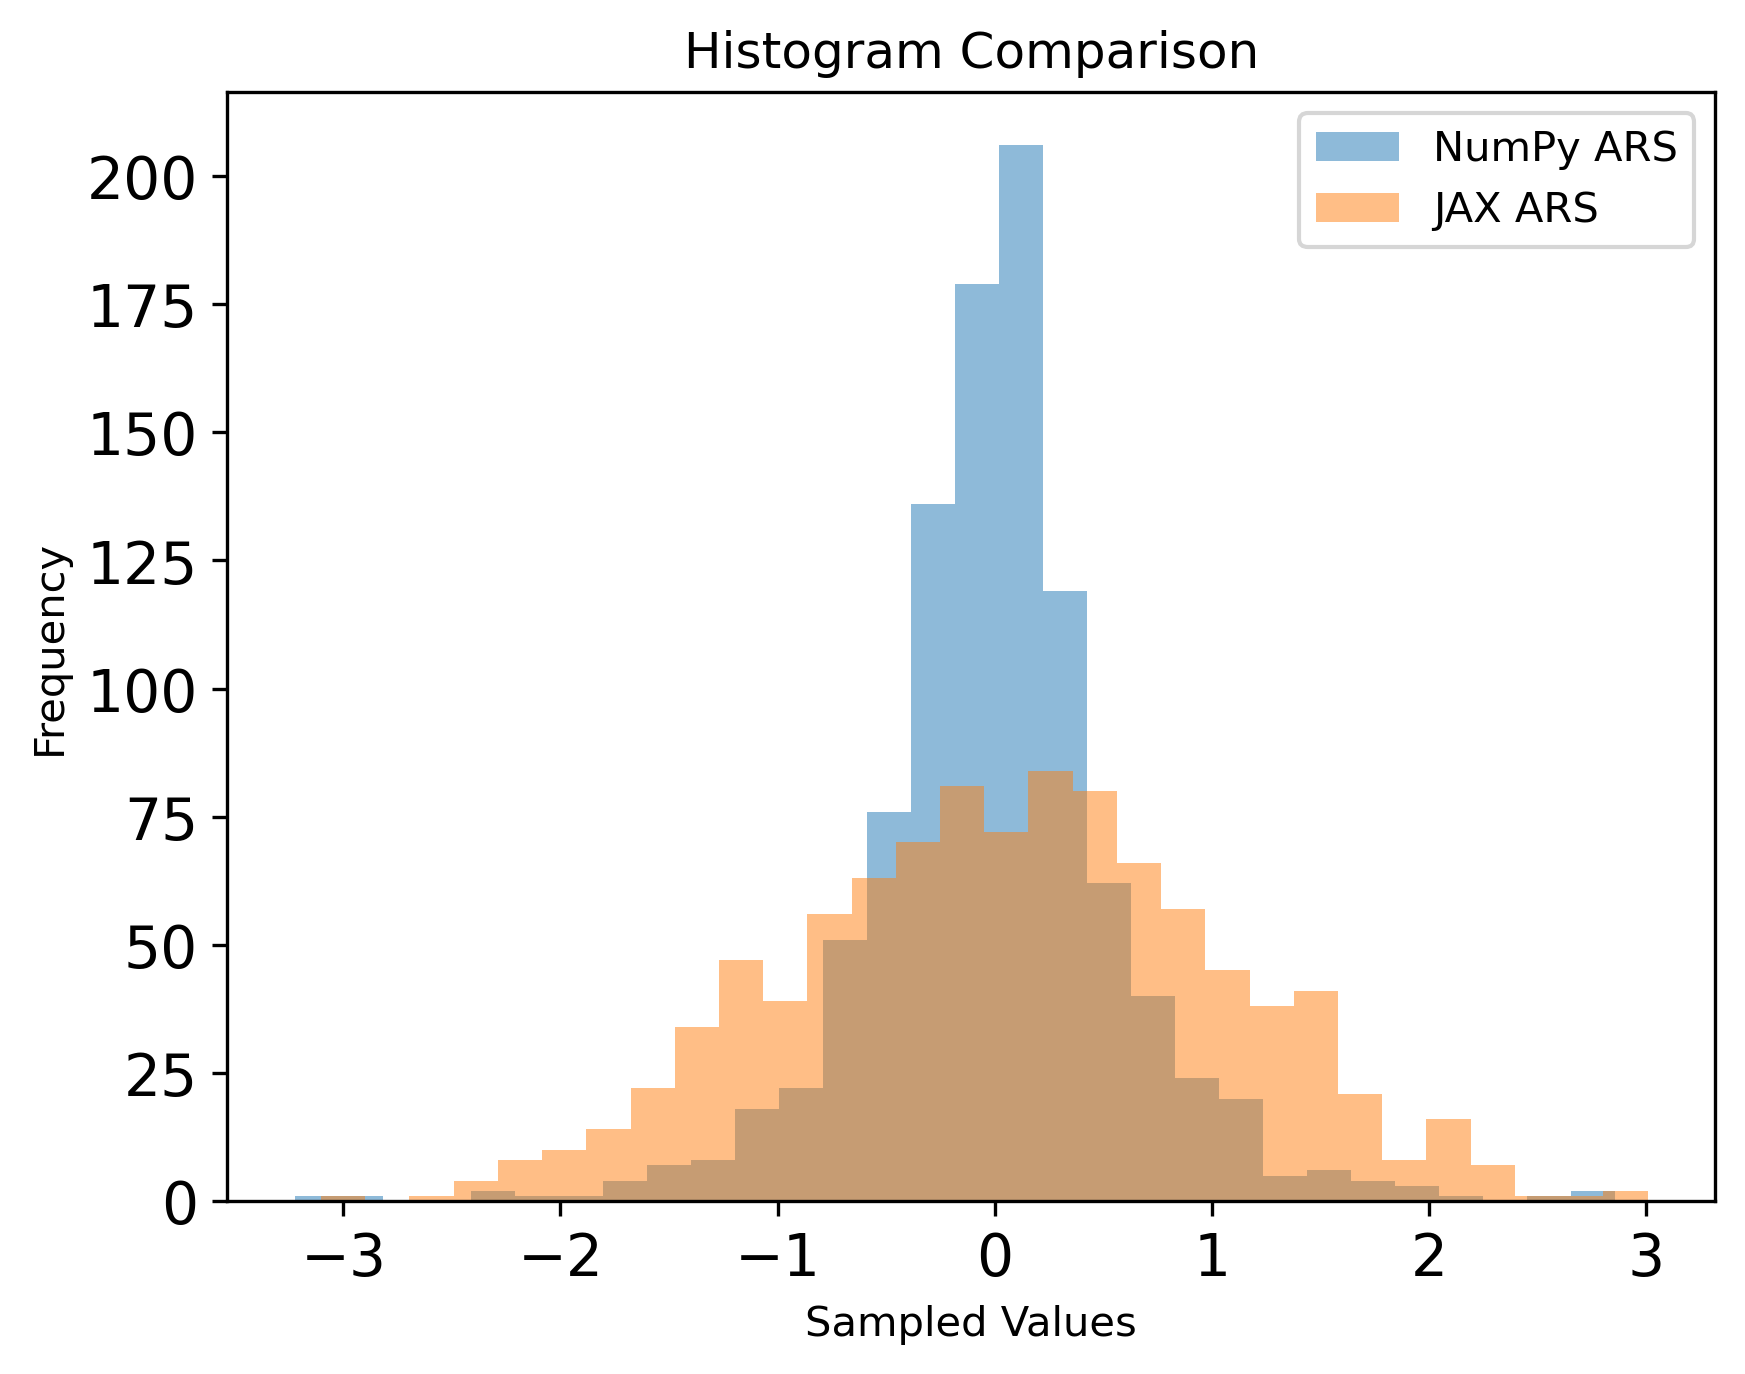

In [ ]:
import numpy as np
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
import time
from ars import ars as ars_numpy
from ars_ad import ars as ars_jax

def gaussian_pdf_numpy(x, mean=0.0, std=1.0):
    return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

def gaussian_pdf_jax(x, mean=0.0, std=1.0):
    return jnp.exp(-0.5 * ((x - mean) / std) ** 2) / (std * jnp.sqrt(2 * jnp.pi))

num_samples = 1000
domain = (-10.0, 10.0)
x_init = [-5.0, 0.0, 5.0]

# NumPy
start_time = time.time()
samples_numpy = ars_numpy(gaussian_pdf_numpy, num_samples, x_init, domain)
time_numpy = time.time() - start_time

# JAX
key = random.PRNGKey(0)
start_time = time.time()
samples_jax = ars_jax(gaussian_pdf_jax, num_samples, x_init, domain, key)
time_jax = time.time() - start_time

print(f"NumPy ARS: {time_numpy:.4f}s, JAX ARS: {time_jax:.4f}s")

plt.figure(dpi=300)
plt.hist(samples_numpy, bins=30, alpha=0.5, label="NumPy ARS")
plt.hist(np.array(samples_jax), bins=30, alpha=0.5, label="JAX ARS")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.title("Histogram Comparison")
plt.xlabel("Sampled Values")
plt.ylabel("Frequency")
plt.show()

**Testing the ars_revised module: v1**

DEBUG: Starting ARS.
DEBUG: Slopes: [ 1.  0. -1.]
DEBUG: Intercepts: [-0.91893853 -0.91893853 -0.91893853]
DEBUG: Pieces (slopes, intercepts): [(1.0, -0.9189385332046727), (0.0, -0.9189385332046727), (-1.0, -0.9189385332046727)]
DEBUG: z_points: [-10, 0.0, 0.0, 10]
DEBUG: Sampling from envelope. Iteration 0
DEBUG: Sampling from envelope.
DEBUG: Iteration 0, x_star=0.5786571684304109, u=0.49056786217939374
DEBUG: Accepted x_star=0.5786571684304109
DEBUG: Sampling from envelope. Iteration 1
DEBUG: Sampling from envelope.
DEBUG: Iteration 1, x_star=-1.0445284526939593, u=0.7121128263920222
DEBUG: Accepted x_star=-1.0445284526939593
DEBUG: Sampling from envelope. Iteration 2
DEBUG: Sampling from envelope.
DEBUG: Iteration 2, x_star=-0.7362436921104314, u=0.9968697951211289
DEBUG: Accepted x_star=-0.7362436921104314
DEBUG: Sampling from envelope. Iteration 3
DEBUG: Sampling from envelope.
DEBUG: Iteration 3, x_star=1.2517690796438652, u=0.7531245881330072
DEBUG: Accepted x_star=1.2517690796

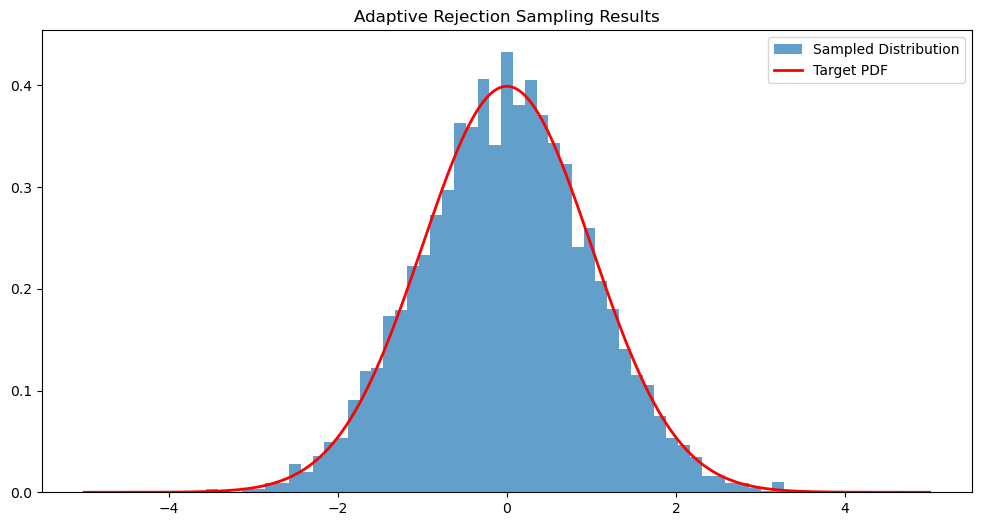

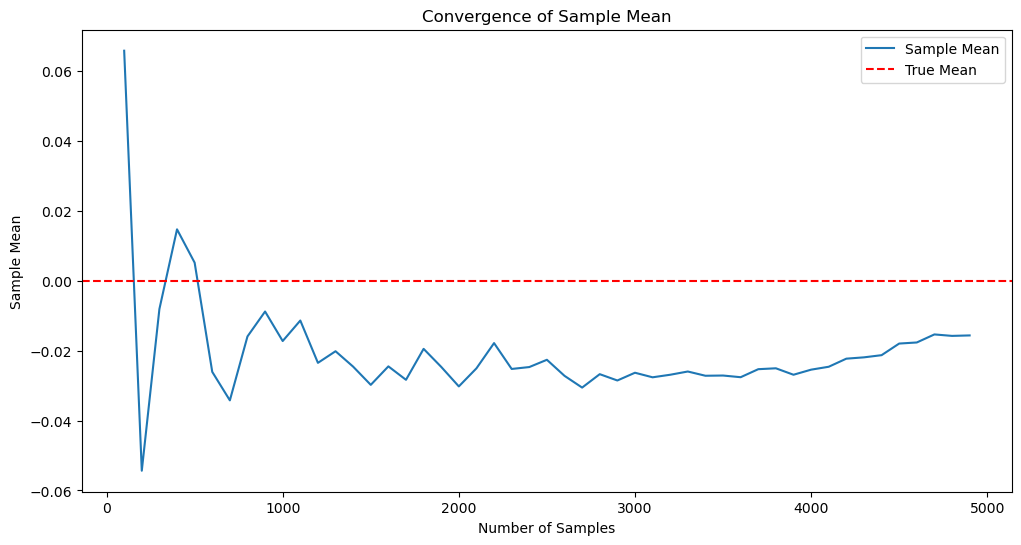

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ars_revised import ars

# Define the target distribution (e.g., standard normal)
def target_pdf(x):
    return norm.pdf(x)

# Parameters for ARS
x_init = [-2, 0, 2]  # Smarter choice for starting points
domain = (-10, 10)
num_samples = 5000
burn_in = 50

# Run ARS
samples = ars(target_pdf, num_samples=num_samples, x_init=x_init, domain=domain, burn_in=burn_in)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Sampled Distribution")
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_pdf(x), 'r-', lw=2, label="Target PDF")
plt.title("Adaptive Rejection Sampling Results")
plt.legend()
plt.show()

# Quantify improvement: Compare sample means and standard deviations

sample_means = [np.mean(samples[:i]) for i in range(100, len(samples), 100)]
true_mean = 0  # Mean of the normal distribution
plt.figure(figsize=(12, 6))
plt.plot(range(100, len(samples), 100), sample_means, label="Sample Mean")
plt.axhline(true_mean, color='r', linestyle='--', label="True Mean")
plt.title("Convergence of Sample Mean")
plt.xlabel("Number of Samples")
plt.ylabel("Sample Mean")
plt.legend()
plt.show()

In [2]:
print(samples)

[-1.26414443  0.66666667  0.66666667 ... -0.2605349  -0.58190724
  2.04293992]


**Testing the ars_revised module: v2**

DEBUG: Starting ARS.
DEBUG: Initializing points: [-0.34482759  0.34482759 -1.03448276]
DEBUG: Iteration 0, x_star=9.956592345449137, u=0.15890876496373751
DEBUG: Rejected x_star=9.956592345449137
DEBUG: Iteration 1, x_star=-2.873066250857643, u=0.42321247289666664
DEBUG: Rejected x_star=-2.873066250857643
DEBUG: Iteration 2, x_star=-0.02451196155353479, u=0.02826392993534954
DEBUG: Accepted x_star=-0.02451196155353479
DEBUG: Iteration 3, x_star=0.4375748386448302, u=0.59933584200938
DEBUG: Accepted x_star=0.4375748386448302
DEBUG: Iteration 4, x_star=-0.5387195543203386, u=0.6337048238517248
DEBUG: Accepted x_star=-0.5387195543203386
DEBUG: Iteration 5, x_star=-0.8514246177377719, u=0.13954835760030093
DEBUG: Accepted x_star=-0.8514246177377719
DEBUG: Iteration 6, x_star=-3.465316536259719, u=0.9419810141331029
DEBUG: Rejected x_star=-3.465316536259719
DEBUG: Iteration 7, x_star=0.031332766107005514, u=0.9746228953529267
DEBUG: Accepted x_star=0.031332766107005514
DEBUG: Iteration 8, x

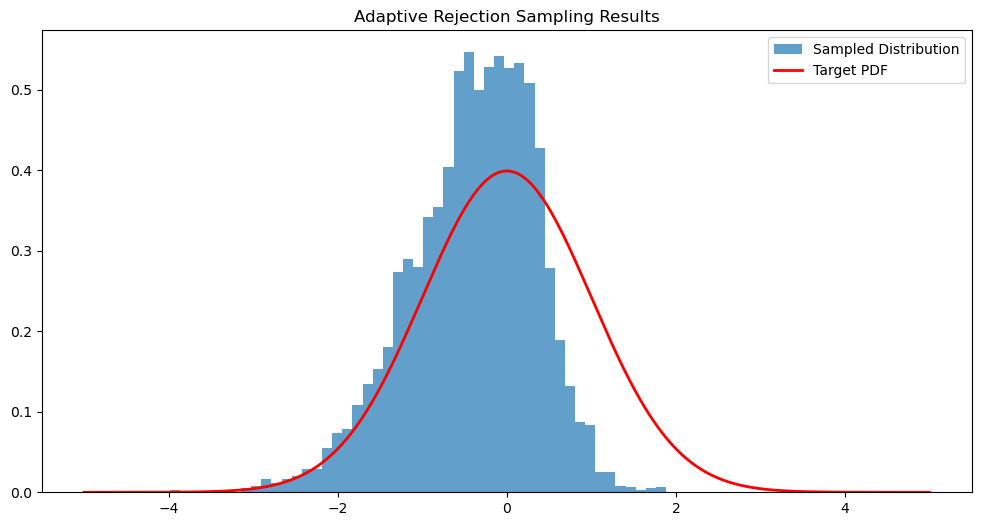

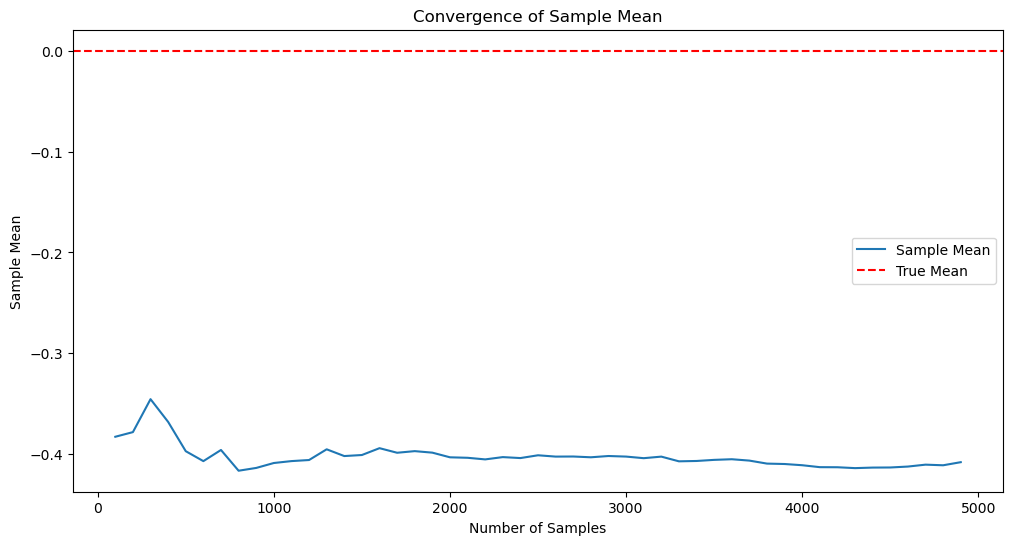

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ars_revised import ars

# Define the target distribution (e.g., standard normal)
def target_pdf(x):
    return norm.pdf(x)

# Parameters for ARS
domain = (-10, 10)
num_samples = 5000
burn_in = 50

# Run ARS
samples = ars(target_pdf, num_samples=num_samples, domain=domain, burn_in=burn_in)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Sampled Distribution")
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_pdf(x), 'r-', lw=2, label="Target PDF")
plt.title("Adaptive Rejection Sampling Results")
plt.legend()
plt.show()

# Quantify improvement: Compare sample means and standard deviations

sample_means = [np.mean(samples[:i]) for i in range(100, len(samples), 100)]
true_mean = 0  # Mean of the normal distribution
plt.figure(figsize=(12, 6))
plt.plot(range(100, len(samples), 100), sample_means, label="Sample Mean")
plt.axhline(true_mean, color='r', linestyle='--', label="True Mean")
plt.title("Convergence of Sample Mean")
plt.xlabel("Number of Samples")
plt.ylabel("Sample Mean")
plt.legend()
plt.show()